<h1>Questions to be handed in on parametric equations and polar coordinates</h1>

<p>Begin by loading our packages for plotting and zero finding:</p>

In [ ]:
using Plots; gadfly()
using Roots

<h3>Plotting</h3>

<p>Parametric plots are ones where the points plotted are parametrized by $t$: $(g(t), f(t))$. The <code>plot</code> function will produce parametric plots when called with <em>two</em> function objects, <code>plot&#40;g,f, a, b&#41;</code>.</p>

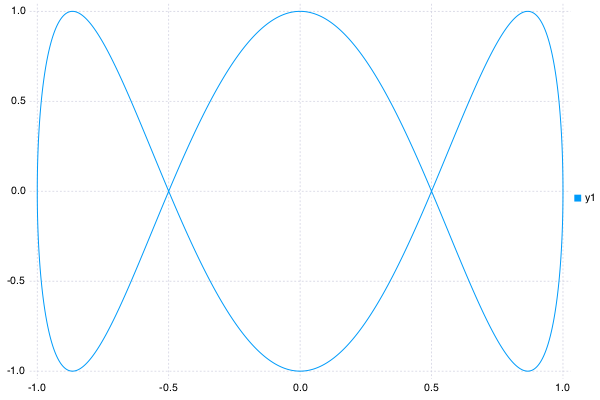

In [ ]:
x(theta) = sin(theta)
y(theta) = cos(3theta)
plot(x, y, 0, 2pi)

<p>This can be used to plot functions in polar representation by converting to Cartesian coordinates:</p>


$$
x(\theta) = r(\theta) \cdot \cos(\theta), \quad
y(\theta) = r(\theta) \cdot \sin(\theta)
$$


<p>but it is easier to let the graphing function do that work. Here is a specialized function:</p>

In [ ]:
function polar(r, a, b)
	 plot(t -> r(t)*cos(t), t->r(t)*sin(t), a, b)
end

polar (generic function with 1 method)

<p>Which is used as follows:</p>

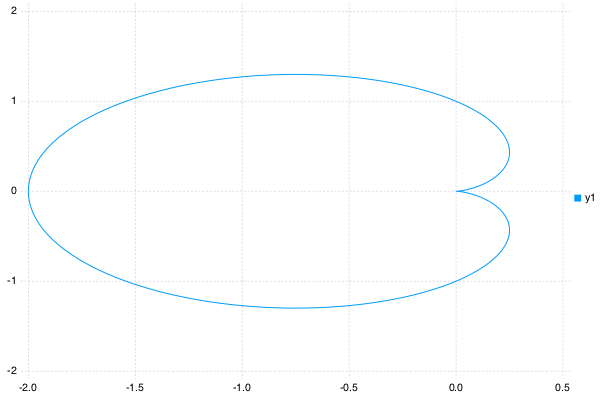

In [ ]:
r(theta) = 1 - cos(theta)	# a cardiod
polar(r, 0, 2pi)		

<h2>tangent lines for parametric equations</h2>

<p>If $c(t) = (x(t), y(t))$ parametrically describes a curve with differentiable functions, then the tangent line $t$ is given by: $dy/dx = y'(t)/x'(t)$. Using <code>D</code> we can compute this quickly.</p>

<p>For example, the curve $x(t) = \cos^3(t)$, $y(t) = \sin^3(t)$ is an astroid. Its tangent line at $\theta = \pi/3$ is found with</p>

In [ ]:
x(t) = cos(t)^3
y(t) = sin(t)^3
t0 = pi/3
m = D(y)(t0) / D(x)(t0)
(x(t0), y(t0)), m		# return point and slope for y = y0 + m (x-x0)

((0.12500000000000008,0.6495190528383289),-1.7320508075688767)

<h3>Area in polar coordinates</h3>

<p>The area bounded by a curve in polar form given by $r(\theta)$ between the rays $\theta=a$ and $\theta=b$ is </p>


$$
Area = \frac{1}{2}\int_a^b (r(\theta))^2 d\theta.
$$


<p>We can check this works for a known figure. When $r=1$, $a=0$, and $b=2\pi$ the area is that of a circle of radius 1, or $\pi$. Here we integrate to compare:</p>

In [ ]:
r(theta) = 1
a, b = 0, 2pi
a, err = quadgk(t -> (1/2)*r(t)^2, a, b)
a - pi

0.0

<hr />

<h3>Questions</h3>

<ul>
<li>A bullet fired from a gun follows a trajectory given by</li>
</ul>


$$
x = at, y = bt - 16t^2 \quad (a, b > 0)
$$


<p>Let $a=500$ and $b=300$. Show graphically or analytically that the bullet leaves the gun at an angle $\theta=\tan^{-1}(b/a)$ and lands at a distance $ab/16$ from the origin.</p>

<ul>
<li>A <em>cycloid</em> is the shape made by tracking a fixed point along a   wheel as it moves away in a direction. If the wheel has radius $R$   and the point is at the bottom of the wheel at $t=0$ then these   functions parameterize the curve:</li>
</ul>


$$
x(t) = R\cdot(t - \sin(t)), \quad y(t) = R  \cdot (1 - \cos(t)).
$$


<p>Verify the following property algebraically. The tangent line at   time $t$ wil go through the top point of the circle of radius $R$   with center at $(R\cdot t, R)$, that is, it contains the point   $(R\cdot t, 2R)$.</p>

<p>Assuming $R=1$, prove this analytically.</p>

<ul>
<li>A <a href="http://en.wikipedia.org/wiki/Bezier_curve">Bezier Curve</a> is a parametric curve which has been found useful in computer graphics. The cubic case is described on Wikipedia by</li>
</ul>

<blockquote>
<p>Four points P0, P1, P2 and P3 in the plane or in higher-dimensional</p>
</blockquote>

<p>space define a cubic Bézier curve. The curve starts at P0 going   toward P1 and arrives at P3 coming from the direction of   P2. Usually, it will not pass through P1 or P2; these points are   only there to provide directional information. The distance between   P0 and P1 determines "how long" the curve moves into direction P2   before turning towards P3.</p>

<p>If we write $p_i = (a_i, b_i)$ for $i = 0, 1, 2, 3$ then the parametric curve is given by:</p>


$$
x(t) = a_0(1-t)^3 + 3a_1t(1-t)^2 + 3a_2t^2(1-t) + a_3t^3, \quad
y(t) = b_0(1-t)^3 + 3b_1t(1-t)^2 + 3b_2t^2(1-t) + b_3t^3
$$


<p>where $t$ is in $[0,1]$.</p>

<p>If we input the  points as pairs like <code>&#40;a,b&#41;</code> into <code>julia</code> we can construct and plot the functions via:</p>

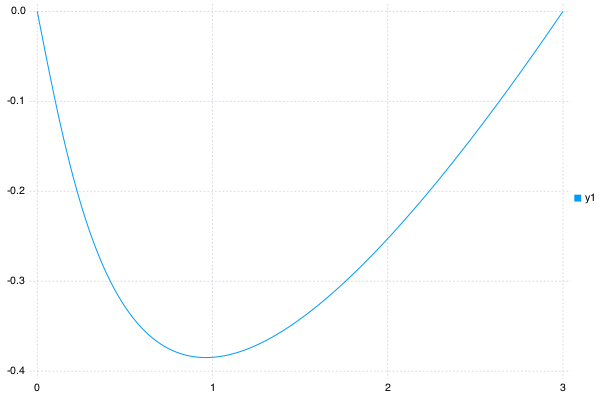

In [ ]:
function bezier(ps...)
    (t -> sum([ps[i+1][1] * t^i*(1-t)^(3-i) for i in 0:3]),
     t -> sum([ps[i+1][2] * t^i*(1-t)^(3-i) for i in 0:3]))
end
x2, y2 =bezier((0,0),(1,-1),(2,-2),(3,0))
plot(x2, y2, 0, 1)

<p>Find a group of four points where the graph is <em>convex</em> (always concave up or down). Find a group of four points where the graph is not convex (it has part of it concave up and some concave down).</p>

<ul>
<li>The <em>tractrix</em> with parameter $l > 0$ is described parametrically by</li>
</ul>


$$
c(t) = (t - l \cdot \tanh(t/l), l \cdot sech(t/l))
$$


<p>At a given value $t$, the tangent line to the curve intersects the $x$-axis. Show that the distance of this line segment is $l$ for <code>t &#61; rand&#40;&#41;</code> (that is a random value of $t$ in $(0,1)$).</p>

<h3>Polar coordinates</h3>

<ul>
<li>Plot the polar curve described by</li>
</ul>


$$
r = \frac{b}{\sin(\theta) - a\cos(\theta)}
$$


<p>for $a=1$, $b=2$. What is the shape of the curve?</p>

<ul>
<li>Plot the polar curve given by $r = \sin(\theta) + \cos(3\theta)$. What more closely describes the shape: a circle, an ellipse, or something odder.</li>
</ul>

<ul>
<li>The polar curve given by $r(\theta) = \theta^2 + 4\theta$ intersects   the $y$-axis when $\theta = 0$ and When $\theta = \pi/2$. Find the   bounded area between the curve and the $y$-axis.</li>
</ul>

<ul>
<li>The <em>cardiod</em> $r(\theta) = 1 - \cos(\theta)$ has some of its area to the right of the $y$ axis. The total area is given by:</li>
</ul>

In [ ]:
r(t) = 1 - cos(t)
quadgk(t -> 1/2 * r(t)^2, 0, 2pi)[1]

4.712388980384691

<p>What percent of the area is to the right of the $y$ axis?</p>

<ul>
<li>Find the area of <strong>one</strong> loop of the <em>lemniscate</em> with equation   $r = \cos(2\theta)$. (Finding the right limits is all the battle.)</li>
</ul>

<ul>
<li>Plotting the polar curve $r(\theta) = \theta \cdot\sin(\theta)$ over   $[0, k\pi]$ produces $k$ nested shapes ($k$ is a positive   integer). Find the area of the smallest one.</li>
</ul>